# 1.Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#define path

path = r'/Users/office/Documents/SuperStore Analysis 04-01-24'

In [4]:
#import data
sales = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Superstore.csv'),encoding='windows-1252')

# 2.Data Cleaning

In [5]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
sales.head(20)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [7]:
sales.shape

(9994, 21)

# Missing Values

In [8]:
#check for missing values

sales.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Duplicates

In [9]:
dups = sales.duplicated()

In [10]:
dups.shape

(9994,)

# Extreme Values

/var/folders/mq/x9y4g6m5733blrm3drj7plxh0000gn/T/ipykernel_45697/1634268489.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['Sales'], bins=25) # Shows extreme values


<Axes: xlabel='Sales', ylabel='Density'>

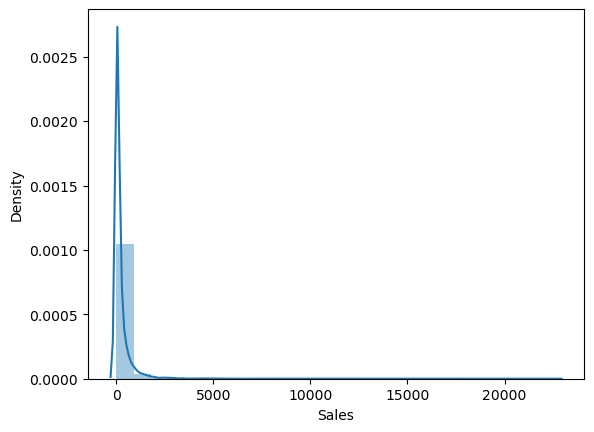

In [13]:
#check for extreme values

sns.distplot(sales['Sales'], bins=25) # Shows extreme values


In [14]:
sales['Sales'].mean() # Check the mean

229.85800083049833

In [15]:
sales['Sales'].median() # Check the median

54.489999999999995

In [16]:
sales['Sales'].max() # Check the max

22638.48

# 3. Data prep for Regression Analysis

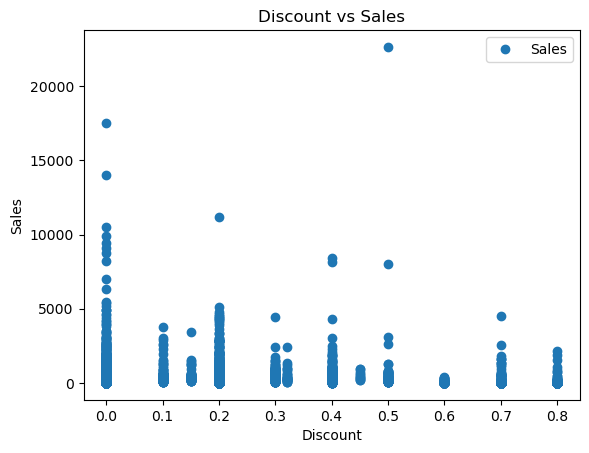

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

sales.plot(x = 'Discount', y='Sales',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Discount vs Sales')  
plt.xlabel('Discount')  
plt.ylabel('Sales')  
plt.show()

# Hypothesis

The more discount means the higher the sales

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = sales['Discount'].values.reshape(-1,1)

y = sales['Sales'].values.reshape(-1,1)

In [21]:
X

array([[0. ],
       [0. ],
       [0. ],
       ...,
       [0.2],
       [0. ],
       [0. ]])

In [22]:
y

array([[261.96 ],
       [731.94 ],
       [ 14.62 ],
       ...,
       [258.576],
       [ 29.6  ],
       [243.16 ]])

In [23]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression Analysis

In [24]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [25]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

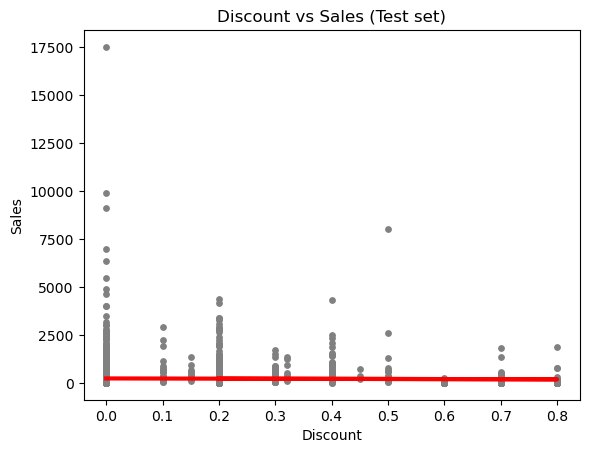

In [27]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Discount vs Sales (Test set)')
plot_test.xlabel('Discount')
plot_test.ylabel('Sales')
plot_test.show()

In [28]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [29]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-56.29364623]]
Mean squared error:  422691.7311885792
R2 score:  0.0009005788018271454


# Analysis

there is a negative slope which indicates a negative relationship between the two variables tested. the increase in discount causes decrease in sales.

The MSE is large which means the regression may not be the best model to represent data and predict the influence of discount on sales.

The R2 is 0 which means the model is not fit

In [30]:
y_predicted

array([[234.23958624],
       [234.23958624],
       [222.980857  ],
       ...,
       [234.23958624],
       [234.23958624],
       [222.980857  ]])

In [31]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,23.3600,234.239586
1,22.6600,234.239586
2,35.2080,222.980857
3,283.9200,222.980857
4,19.8240,222.980857
5,39.9200,222.980857
6,68.4800,222.980857
7,1591.0200,234.239586
8,156.3728,216.225619
9,3499.9300,234.239586


There is a huge difference between the actual values and the predicted values which means the model is not fit to make predictions.

# compare how the regression fits the training test

In [32]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [33]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-56.29364623]]
Mean squared error:  373328.996014331
R2 score:  0.0003607628341824043


Analysis

there is a negative slope which indicates a negative relationship between the two variables tested. the increase in discount causes decrease in sales.
The MSE is large which means the regression may not be the best model to represent data and predict the influence of discount on sales.
The R2 is 0 which means the model is not fit

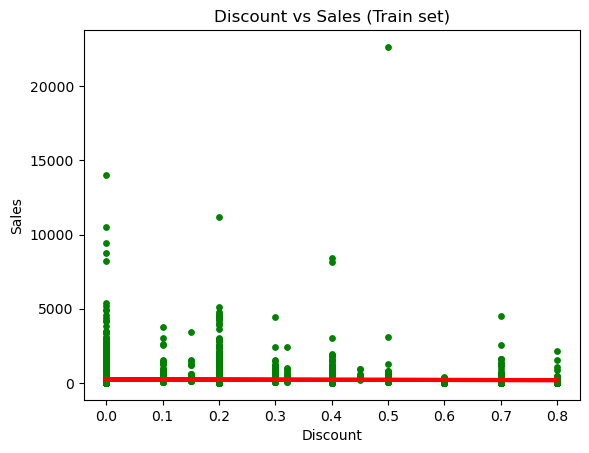

In [35]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Discount vs Sales (Train set)')
plot_test.xlabel('Discount')
plot_test.ylabel('Sales')
plot_test.show()